<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/gan_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.vision.gan import *

In [3]:
from PIL import Image, ImageDraw, ImageFont

In [1]:
pip install "torch==1.4" "torchvision==0.5.0" 

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 38.7MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [4]:
path = untar_data(URLs.PETS)
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [5]:
path_hr = path/'images'
path_lr = path/'crappy'

In [6]:
img = path_hr.ls()[0]
img

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_177.jpg')

In [7]:
d = path_lr/img.relative_to(path_hr)
d

PosixPath('/root/.fastai/data/oxford-iiit-pet/crappy/Bengal_177.jpg')

In [8]:
d.parent.mkdir(parents = True, exist_ok=True)

In [20]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/crappy'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

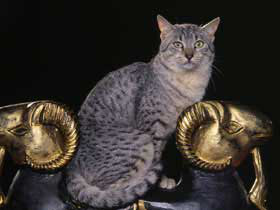

In [25]:
i = PIL.Image.open(img)
i

In [26]:
targ_sz = resize_to(i, 96, use_min=True)
targ_sz

(128, 96)

In [28]:
i.size
i = i.resize(targ_sz, resample = PIL.Image.BILINEAR).convert('RGB')
w, h = i.size

In [29]:
w, h

(128, 96)

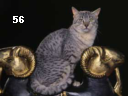

In [31]:
q = random.randint(10, 70)
ImageDraw.Draw(i).text((random.randint(0, w//2), random.randint(0, h//2)), str(q), fill = (255, 255, 255))
i

In [32]:
i.save(d, quality = q)

In [34]:
path_lr.ls()[0].

'Egyptian_Mau_173'

In [9]:
!pip install ipdb

  Created wheel for ipdb: filename=ipdb-0.13.3-cp36-none-any.whl size=10848 sha256=540e0504a6a3567eca65c9e4224e0a68e1b7a35f5457b8e17e0ad9704df4dff9
  Stored in directory: /root/.cache/pip/wheels/75/00/30/4169bcc3643f0cf946dcf37af1b71364b390c4df91da02b03c
Successfully built ipdb


In [10]:
from ipdb import set_trace as st

In [11]:
def crappify(normal_image, _):

  dest = path_lr/normal_image.relative_to(path_hr)
  normal_image = PIL.Image.open(normal_image)
  targ_size = resize_to(normal_image, 96, use_min = True)
  img = normal_image.resize(targ_size, resample = PIL.Image.BILINEAR).convert('RGB')
  w, h = img.size
  q = random.randint(10, 70)
  ImageDraw.Draw(img).text((random.randint(w//3, 2*w//3), random.randint(h//3, 2*h//3)), str(q), fill = (255, 255, 255))
  img.save(dest, quality = q)

In [12]:
il = ImageList.from_folder(path_hr)

In [13]:
path_hr.ls()[1]

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_164.jpg')

In [14]:
crappify(path_hr.ls()[1], 1)
path_lr.ls()[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/crappy/Egyptian_Mau_164.jpg')]

In [15]:
parallel(crappify, il.items)

In [16]:
len(path_hr.ls()), len(path_lr.ls())

(7393, 7390)

In [17]:
src = ImageImageList.from_folder(path_lr).split_by_rand_pct(0.2)

In [18]:
src

ItemLists;

Train: ImageImageList (5912 items)
Image (3, 128, 96),Image (3, 96, 128),Image (3, 144, 96),Image (3, 96, 96),Image (3, 96, 128)
Path: /root/.fastai/data/oxford-iiit-pet/crappy;

Valid: ImageImageList (1478 items)
Image (3, 96, 128),Image (3, 95, 155),Image (3, 143, 96),Image (3, 144, 96),Image (3, 96, 128)
Path: /root/.fastai/data/oxford-iiit-pet/crappy;

Test: None

In [19]:
path_lr.ls()[1].name
get_label = lambda x: path_hr/x.name
def get_data(bs, size, src = src):
  data = src.label_from_func(get_label).transform(get_transforms(max_zoom = 2.), size = size, tfm_y = True).databunch(bs = bs).normalize(imagenet_stats, do_y = True)
  data.c = 3
  return data

In [20]:
bs, size = 32, 128
data = get_data(bs, size)

In [21]:
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /root/.fastai/data/oxford-iiit-pet/crappy;

Valid: LabelList (1478 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /root/.fastai/data/oxford-iiit-pet/crappy;

Test: None

In [22]:
arch = models.resnet34
wd = 1e-03
y_range = (-3., 3.)
loss_gen = MSELossFlat()
def create_gen_learner():
  return unet_learner(data, arch, wd = wd, blur = True, norm_type= NormType.Weight, self_attention= True, y_range = y_range, loss_func = loss_gen)

In [23]:
learn_gen = create_gen_learner()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [24]:
learn_gen.fit_one_cycle(2, pct_start = 0.8)

epoch,train_loss,valid_loss,time
0,0.069647,0.054737,01:06
1,0.058258,0.051701,01:01


In [25]:
learn_gen.unfreeze()
learn_gen.fit_one_cycle(3, slice(1e-06, 1e-03))

epoch,train_loss,valid_loss,time
0,0.052642,0.049959,01:01
1,0.050838,0.048331,01:01
2,0.050473,0.047888,01:01


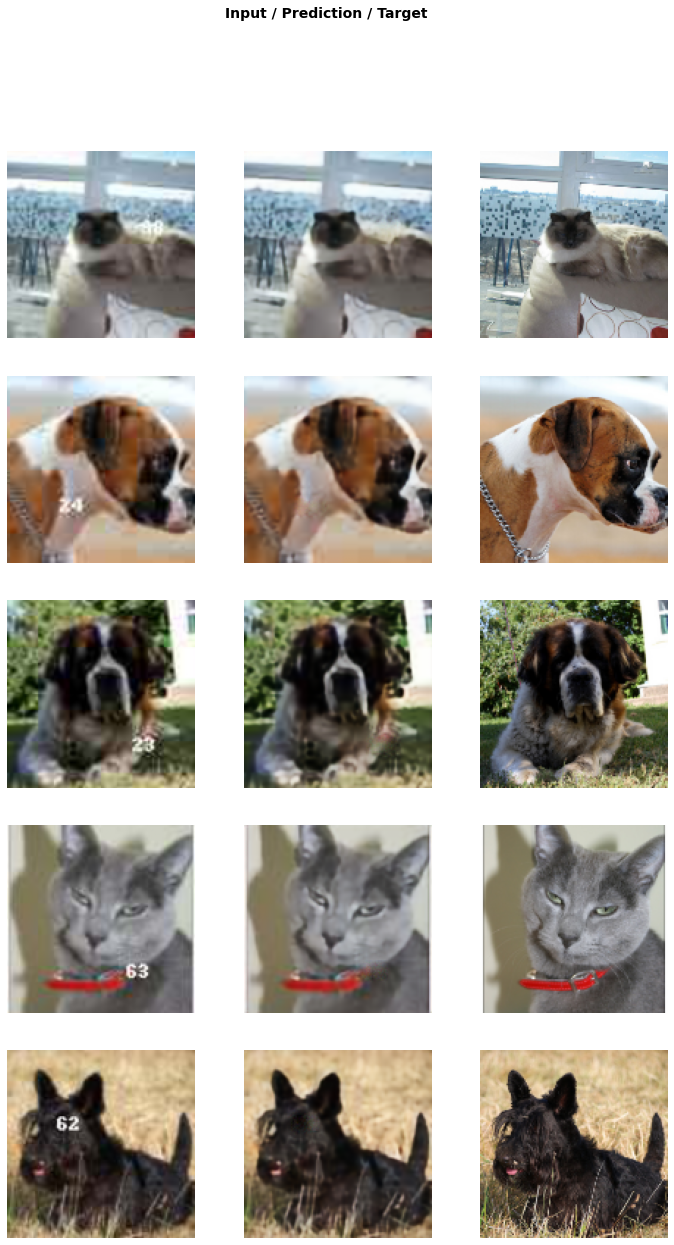

In [26]:
learn_gen.show_results()

In [28]:
learn_gen.save('gen_2')

In [35]:
x = data.fix_dl
# len(x.items)
x.dataset.items[0].name

'Bengal_177.jpg'

In [40]:
name_gen = 'generated'
path_gen = path/name_gen
path_gen.mkdir(exist_ok = True)

def save_gens(data_loader):
  i = 0
  names = data_loader.dataset.items
  for batch in data_loader:
    preds = learn_gen.pred_batch(batch = batch, reconstruct=True)
    for obj in preds:
      obj.save(path_gen/names[i].name)
      i += 1

In [41]:
save_gens(data.fix_dl)

In [42]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/generated'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/crappy')]

In [44]:
(path/name_gen).ls()[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/generated/Bengal_177.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/generated/Egyptian_Mau_164.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/generated/Abyssinian_124.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/generated/newfoundland_186.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/generated/Ragdoll_162.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/generated/Birman_191.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/generated/basset_hound_82.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/generated/Ragdoll_202.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/generated/english_cocker_spaniel_190.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/generated/beagle_90.jpg')]

In [45]:
learn_gen = None
gc.collect()

32537

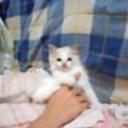

In [49]:
Image.open((path/name_gen).ls()[4])

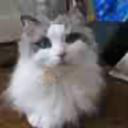

In [50]:
Image.open((path/name_gen).ls()[7]) 

In [56]:
def get_critic_data(classes, bs, size):
  src = ImageList.from_folder(path, include = classes).split_by_rand_pct(0.1).label_from_folder(classes = classes)
  data = src.transform(get_transforms(max_zoom= 2.), size = size).databunch(bs = bs).normalize(imagenet_stats)
  return data

In [57]:
classes = ['images', name_gen]
data_crit = get_critic_data(classes, bs = bs, size = size)

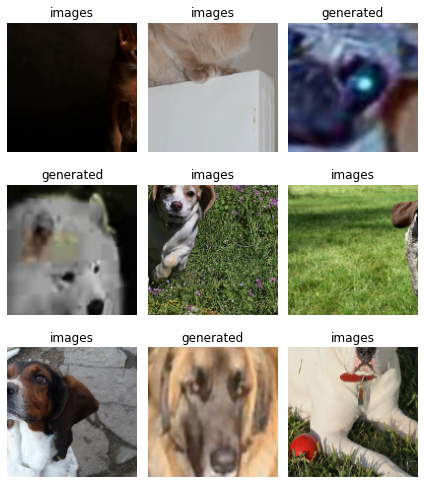

In [59]:
data_crit.show_batch(rows = 3, figsize = (6, 7))

In [62]:
loss_critic = AdaptiveLoss(nn.BCEWithLogitsLoss())

In [64]:
def create_critic_learner(data, metrics):
  return Learner(data, gan_critic(), loss_func= loss_critic)

learn_critic = create_critic_learner(data_crit, accuracy)

In [65]:
learn_critic.fit_one_cycle(6, 1e-03)

epoch,train_loss,valid_loss,time
0,0.643929,0.661193,01:46
1,0.457634,0.555831,01:44
2,0.158676,0.474015,01:44
3,0.095717,0.102802,01:43
4,0.057359,0.045139,01:44
5,0.046910,0.067084,01:44


In [66]:
learn_critic = None
gc.collect()

225

In [67]:
learn_critic = create_critic_learner(data_crit, accuracy_thresh_expand)
learn_critic.fit_one_cycle(6, 1e-03)

epoch,train_loss,valid_loss,time
0,0.624893,0.635161,01:44
1,0.412454,0.427717,01:43
2,0.139215,0.103539,01:44
3,0.080596,0.187985,01:44
4,0.052396,0.063485,01:44
5,0.040547,0.039186,01:44


In [68]:
learn_critic.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


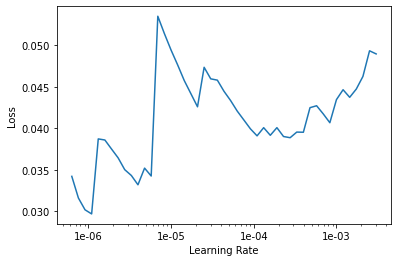

In [70]:
learn_critic.recorder.plot()

In [72]:
learn_gen = create_gen_learner()
learn_gen.load('gen_2')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /root/.fastai/data/oxford-iiit-pet/crappy;

Valid: LabelList (1478 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /root/.fastai/data/oxford-iiit-pet/crappy;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilati

In [76]:
switcher = partial(AdaptiveGANSwitcher, critic_thresh = 0.65)
learn = GANLearner.from_learners(learn_gen= learn_gen, learn_crit= learn_critic, weights_gen = (1., 50.), show_img = False, switcher= switcher, 
                                 opt_func = partial(optim.Adam, betas = (0., 0.99)))
learn.callback_fns.append(partial(GANDiscriminativeLR, mult_lr = 5.))

In [77]:
lr = 1e-04

In [78]:
learn.fit(20, lr)

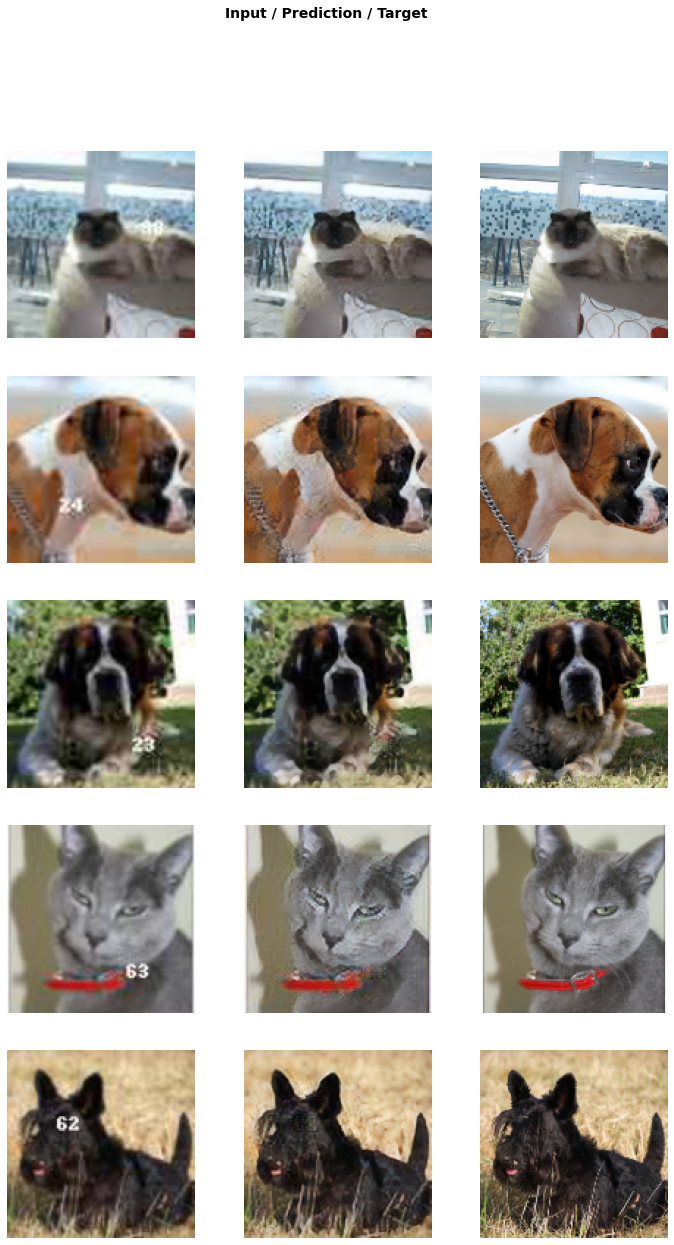

In [79]:
learn.show_results()

In [80]:
learn.fit(20, lr)

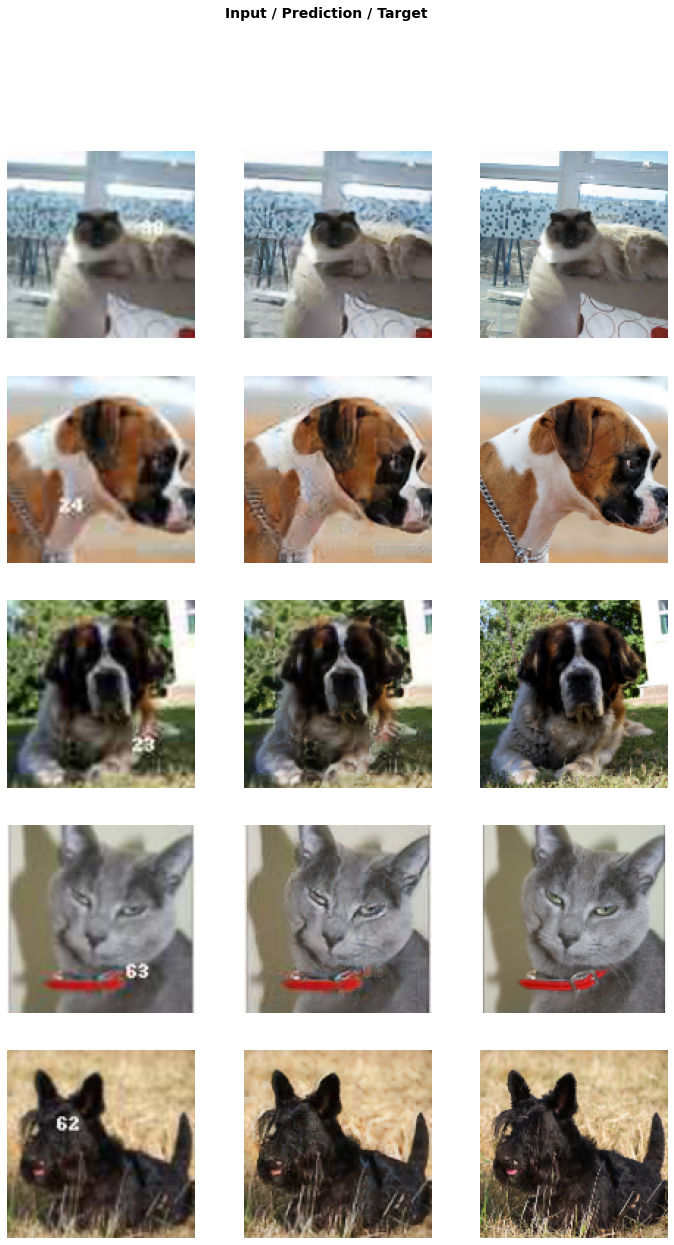

In [81]:
learn.show_results()